In [17]:
!pip install tensorflow matplotlib numpy pillow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import requests
import zipfile
from io import BytesIO

In [30]:
def download_sample_dataset():
    import time
    from urllib.parse import urlparse

    os.makedirs('data/cats', exist_ok=True)
    os.makedirs('data/dogs', exist_ok=True)

    cat_urls = [
        'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/400px-Cat03.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Cat_poster_1.jpg/400px-Cat_poster_1.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Sheba1.JPG/400px-Sheba1.JPG',
        'https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/400px-Cat_November_2010-1a.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Orange_tabby_cat_sitting_on_fallen_leaves-Hisashi-01A.jpg/400px-Orange_tabby_cat_sitting_on_fallen_leaves-Hisashi-01A.jpg'
    ]

    dog_urls = [
        'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Collage_of_Nine_Dogs.jpg/400px-Collage_of_Nine_Dogs.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Golde33443.jpg/400px-Golde33443.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Huskiesatrest.jpg/400px-Huskiesatrest.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/YellowLabradorLooking_new.jpg/400px-YellowLabradorLooking_new.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Dog_Breeds.jpg/400px-Dog_Breeds.jpg'
    ]

    def download_image(url, filepath, max_retries=3):
        """Download a single image with retry logic"""
        for attempt in range(max_retries):
            try:
                headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
                response = requests.get(url, headers=headers, timeout=10)
                response.raise_for_status()

                img = Image.open(BytesIO(response.content))
                img = img.convert('RGB')
                img = img.resize((224, 224))
                img.save(filepath)
                return True
            except Exception as e:
                print(f"Attempt {attempt + 1} failed: {e}")
                if attempt < max_retries - 1:
                    time.sleep(2)
        return False

    print("Downloading cat images...")
    cat_count = 0
    for i, url in enumerate(cat_urls):
        filepath = f'data/cats/cat_{i+1}.jpg'
        if download_image(url, filepath):
            print(f" Downloaded cat image {i+1}")
            cat_count += 1
        else:
            print(f"Failed to download cat image {i+1}")

    print("Downloading dog images...")
    dog_count = 0
    for i, url in enumerate(dog_urls):
        filepath = f'data/dogs/dog_{i+1}.jpg'
        if download_image(url, filepath):
            print(f" Downloaded dog image {i+1}")
            dog_count += 1
        else:
            print(f" Failed to download dog image {i+1}")

    print(f"\nDownload complete! Cats: {cat_count}, Dogs: {dog_count}")
    return cat_count, dog_count

def use_tensorflow_dataset():
    """Alternative: Use TensorFlow's built-in dataset"""
    print("Using TensorFlow's built-in dataset...")

    import tensorflow_datasets as tfds

    try:
        (train_ds, val_ds), info = tfds.load(
            'cats_vs_dogs',
            split=['train[:100]', 'train[100:120]'],
            shuffle_files=True,
            as_supervised=True,
            with_info=True
        )

        # Create directories
        os.makedirs('data/cats', exist_ok=True)
        os.makedirs('data/dogs', exist_ok=True)

        for i, (image, label) in enumerate(train_ds.take(80)):
            img_array = image.numpy()
            img = Image.fromarray(img_array)

            if label.numpy() == 0:  # cat
                img.save(f'data/cats/cat_{i+1}.jpg')
            else:  # dog
                img.save(f'data/dogs/dog_{i+1}.jpg')

        print("TensorFlow dataset loaded successfully!")
        return True

    except Exception as e:
        print(f"TensorFlow dataset not available: {e}")
        return False

def create_synthetic_dataset():
    """Create synthetic colored rectangles as fallback"""
    print("Creating synthetic dataset...")

    os.makedirs('data/cats', exist_ok=True)
    os.makedirs('data/dogs', exist_ok=True)

    for i in range(10):
        img = Image.new('RGB', (224, 224), color=(255, 140, 0))
        pixels = np.array(img)
        noise = np.random.randint(0, 50, pixels.shape)
        pixels = np.clip(pixels + noise, 0, 255)
        img = Image.fromarray(pixels.astype(np.uint8))
        img.save(f'data/cats/cat_{i+1}.jpg')

    for i in range(10):
        img = Image.new('RGB', (224, 224), color=(139, 69, 19))
        pixels = np.array(img)
        noise = np.random.randint(0, 50, pixels.shape)
        pixels = np.clip(pixels + noise, 0, 255)
        img = Image.fromarray(pixels.astype(np.uint8))
        img.save(f'data/dogs/dog_{i+1}.jpg')

    print("Synthetic dataset created!")
    return 10, 10

def setup_dataset():
    """Try different dataset setup methods"""
    print("Setting up dataset...")

    try:
        cat_count, dog_count = download_sample_dataset()
        if cat_count > 0 and dog_count > 0:
            print(" Successfully downloaded sample dataset!")
            return True
    except Exception as e:
        print(f"URL download failed: {e}")

    try:
        if use_tensorflow_dataset():
            print(" Successfully loaded TensorFlow dataset!")
            return True
    except Exception as e:
        print(f"TensorFlow dataset failed: {e}")

    try:
        cat_count, dog_count = create_synthetic_dataset()
        print(f" Created synthetic dataset with {cat_count} cats and {dog_count} dogs")
        print("Note: This is a synthetic dataset for demonstration purposes")
        return True
    except Exception as e:
        print(f"Synthetic dataset creation failed: {e}")
        return False

if setup_dataset():
    print("\n Dataset ready for training!")
else:
    print("\n Failed to set up dataset. Please check your connection and try again.")

Setting up dataset...
 Downloaded cat image 1
 Downloaded cat image 2
 Downloaded cat image 3
 Downloaded cat image 4
 Downloaded cat image 5
 Downloaded dog image 1
 Downloaded dog image 2
 Downloaded dog image 3
 Downloaded dog image 4
 Downloaded dog image 5

Download complete! Cats: 5, Dogs: 5
 Successfully downloaded sample dataset!

 Dataset ready for training!


In [21]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

print("Class names:", train_generator.class_indices)

Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Class names: {'cats': 0, 'dogs': 1}


Sample Images from Dataset:


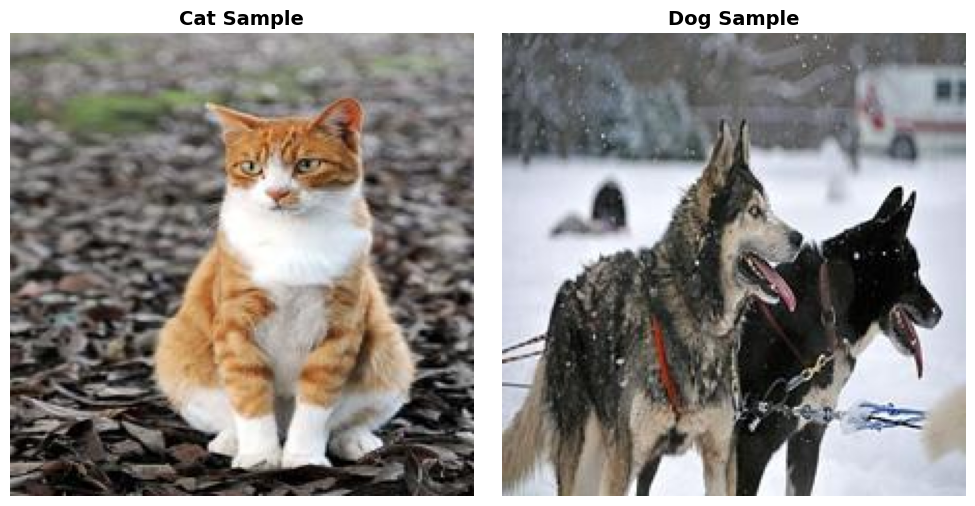

Dataset Summary:
  • Cat images: 5
  • Dog images: 5
  • Total images: 10


In [23]:
def plot_sample_images():
    import glob

    cat_images = glob.glob('data/cats/*.jpg')
    dog_images = glob.glob('data/dogs/*.jpg')

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    if cat_images:
        cat_img = Image.open(cat_images[0])
        axes[0].imshow(cat_img)
        axes[0].set_title("Cat Sample", fontsize=14, fontweight='bold')
        axes[0].axis('off')

    if dog_images:
        dog_img = Image.open(dog_images[0])
        axes[1].imshow(dog_img)
        axes[1].set_title("Dog Sample", fontsize=14, fontweight='bold')
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Dataset Summary:")
    print(f"  • Cat images: {len(cat_images)}")
    print(f"  • Dog images: {len(dog_images)}")
    print(f"  • Total images: {len(cat_images) + len(dog_images)}")

def plot_multiple_samples():
    import glob

    cat_images = glob.glob('data/cats/*.jpg')
    dog_images = glob.glob('data/dogs/*.jpg')

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    for i in range(min(3, len(cat_images))):
        cat_img = Image.open(cat_images[i])
        axes[0, i].imshow(cat_img)
        axes[0, i].set_title(f"Cat {i+1}", fontsize=12, fontweight='bold')
        axes[0, i].axis('off')

    for i in range(min(3, len(dog_images))):
        dog_img = Image.open(dog_images[i])
        axes[1, i].imshow(dog_img)
        axes[1, i].set_title(f"Dog {i+1}", fontsize=12, fontweight='bold')
        axes[1, i].axis('off')

    for i in range(len(cat_images), 3):
        axes[0, i].axis('off')
    for i in range(len(dog_images), 3):
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

print("Sample Images from Dataset:")
plot_sample_images()



In [24]:
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

model = create_model()
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.001
)

EPOCHS = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6917 - learning_rate: 0.0010
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - accuracy: 0.5000 - loss: 0.6846 - val_accuracy: 0.5000 - val_loss: 0.6767 - learning_rate: 0.0010
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.5000 - loss: 0.7148 - val_accuracy: 0.5000 - val_loss: 0.6839 - learning_rate: 0.0010
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 0.6250 - loss: 0.6669 - val_accuracy: 0.5000 - val_loss: 0.6987 - learning_rate: 0.0010
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.5000 - loss: 0.7064 - val_accuracy: 0.5000 - val_loss: 0.7016 - learning_rate: 0.0010


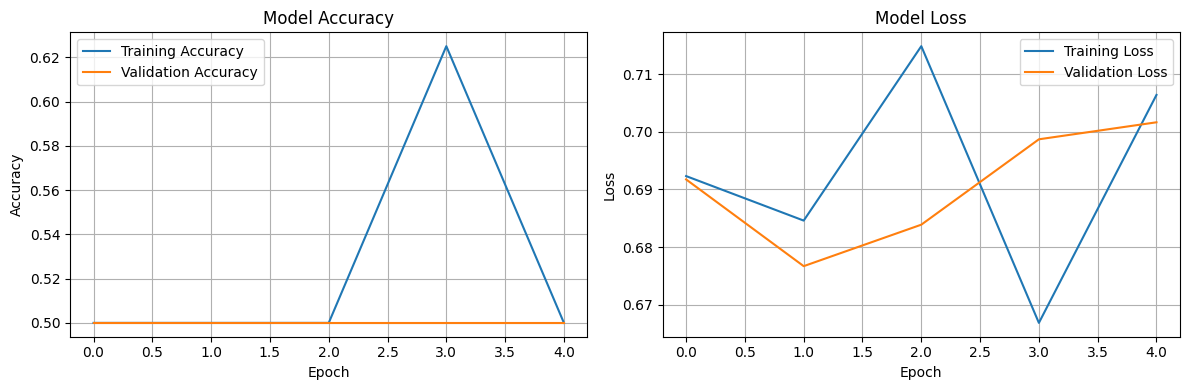

In [26]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [27]:
def predict_image(model, image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    confidence = prediction[0][0]

    if confidence > 0.5:
        return "Dog", confidence
    else:
        return "Cat", 1 - confidence

def test_predictions():
    cat_files = os.listdir('data/cats')
    dog_files = os.listdir('data/dogs')

    print("Testing on Cat Images:")
    for i, cat_file in enumerate(cat_files[:3]):
        cat_path = os.path.join('data/cats', cat_file)
        prediction, confidence = predict_image(model, cat_path)
        print(f"Cat {i+1}: Predicted as {prediction} with {confidence:.2f} confidence")

    print("\nTesting on Dog Images:")
    for i, dog_file in enumerate(dog_files[:3]):
        dog_path = os.path.join('data/dogs', dog_file)
        prediction, confidence = predict_image(model, dog_path)
        print(f"Dog {i+1}: Predicted as {prediction} with {confidence:.2f} confidence")

test_predictions()

Testing on Cat Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Cat 1: Predicted as Dog with 0.56 confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Cat 2: Predicted as Dog with 0.53 confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Cat 3: Predicted as Dog with 0.56 confidence

Testing on Dog Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Dog 1: Predicted as Dog with 0.57 confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Dog 2: Predicted as Dog with 0.59 confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Dog 3: Predicted as Dog with 0.56 confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


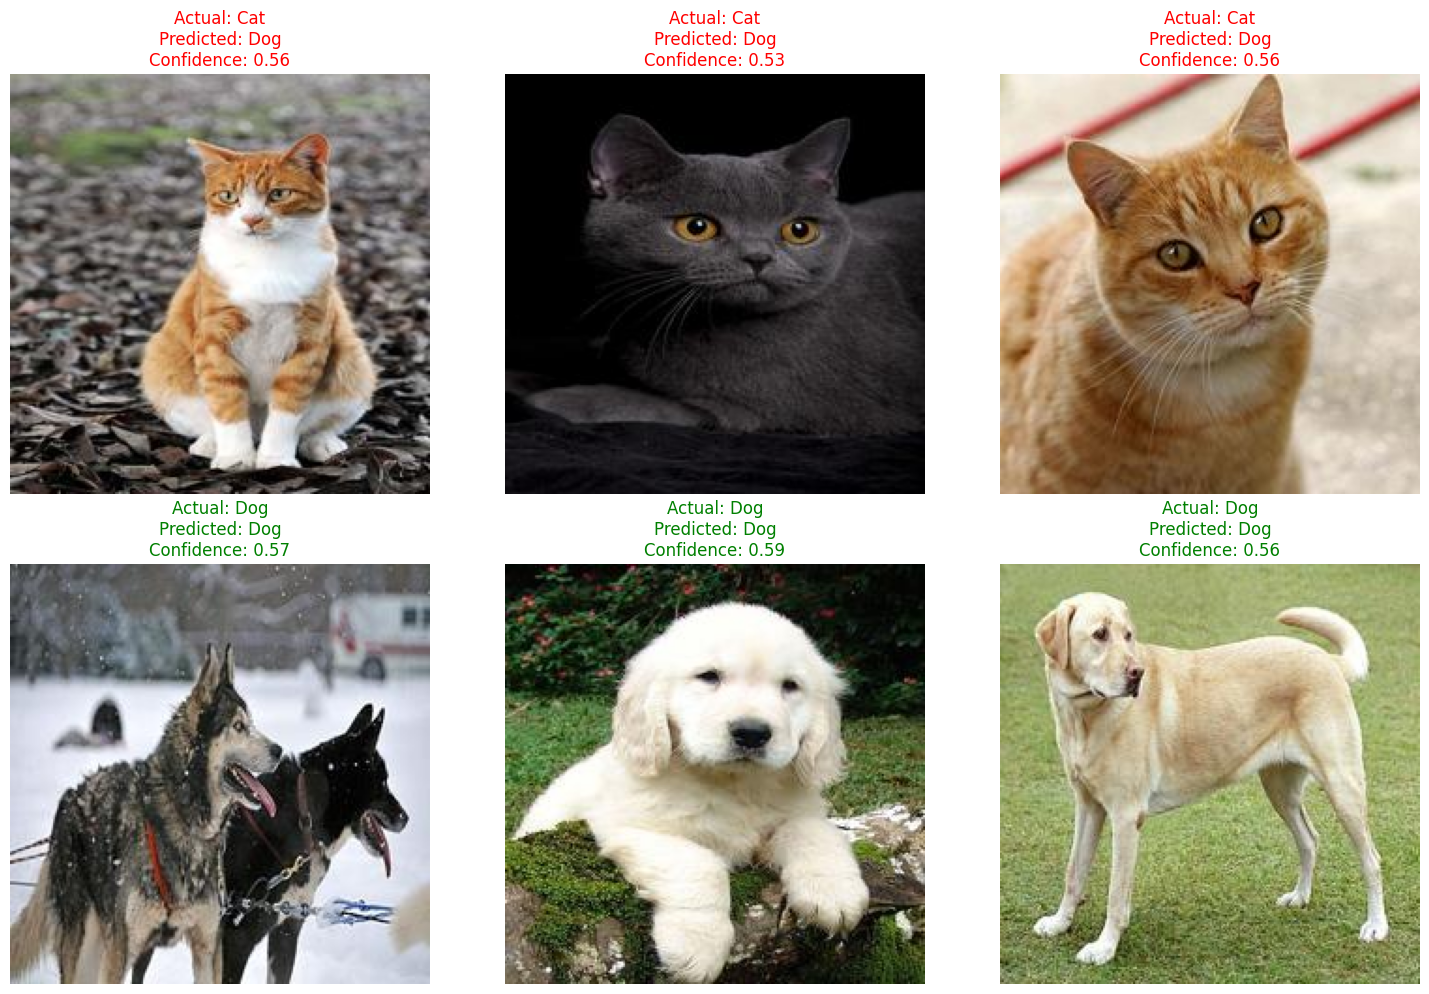

In [28]:
def display_predictions():
    plt.figure(figsize=(15, 10))

    cat_files = os.listdir('data/cats')
    dog_files = os.listdir('data/dogs')

    for i in range(min(3, len(cat_files))):
        plt.subplot(2, 3, i + 1)
        cat_path = os.path.join('data/cats', cat_files[i])
        img = Image.open(cat_path)
        plt.imshow(img)

        prediction, confidence = predict_image(model, cat_path)
        color = 'green' if prediction == 'Cat' else 'red'
        plt.title(f"Actual: Cat\nPredicted: {prediction}\nConfidence: {confidence:.2f}", color=color)
        plt.axis('off')

    for i in range(min(3, len(dog_files))):
        plt.subplot(2, 3, i + 4)
        dog_path = os.path.join('data/dogs', dog_files[i])
        img = Image.open(dog_path)
        plt.imshow(img)

        prediction, confidence = predict_image(model, dog_path)
        color = 'green' if prediction == 'Dog' else 'red'
        plt.title(f"Actual: Dog\nPredicted: {prediction}\nConfidence: {confidence:.2f}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_predictions()

In [29]:
def evaluate_model():
    validation_generator.reset()

    val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    return val_loss, val_accuracy

def save_model():
    model.save('cat_dog_classifier.h5')
    print("Model saved as 'cat_dog_classifier.h5'")

val_loss, val_accuracy = evaluate_model()
save_model()

print("\n" + "-"*50)
print("FINAL RESULTS")
print("-"*50)
print(f"Final Validation Accuracy: {val_accuracy:.2%}")
print(f"Final Validation Loss: {val_loss:.4f}")
print("-"*50)

Validation Loss: 0.6916
Validation Accuracy: 0.5000
Model saved as 'cat_dog_classifier.h5'

--------------------------------------------------
FINAL RESULTS
--------------------------------------------------
Final Validation Accuracy: 50.00%
Final Validation Loss: 0.6916
--------------------------------------------------
